In [1]:
import ROOT as rt
import uproot
import numpy as np
import os
import sys
sys.path.append(os.getcwd().replace('scripts', 'lib'))

import tdrstyle
a = tdrstyle.setTDRStyle()

print(sys.version)

Welcome to JupyROOT 6.28/00
3.9.12 (main, Jun  7 2022, 16:09:12) 
[GCC 11.2.0]


# load a signal ntuple
In this ntuple, the DBSCAN algorithm is already performed to reconstruct clusters from rechits, so only clusters and the cluster properties that you've seen in the previous exercise are stored

In [2]:
path = '/eos/uscms/store/user/cmsdas/2024/long_exercises/MDS/signal/nocuts/'
root_dir =uproot.open(path + 'ggH_HToSSTobbbb_MH-125_MS-40_ctau-1000_137000pb_weighted.root')
T = root_dir['MuonSystem']

# Selections
Here we will select for events that have only one LLP decaying in the CSCs and calculate the probabilty of a cluster being reconstructed given that an LLP decayed in the CSC.
You will use the following branches:
* `gLLP_csc`: Boolean, a LLP-level variable that tells you whether an LLP decayed in CSC
* `gLLP_decay_vertex_z`: LLP-level variable that returns LLP lab frame decay vertex in Z [cm]
* `cscRechitCluster_match_gLLP_csc`: Boolean, cluster-level variable that returns true of the cluster is matched to an LLP ($\Delta R (cluster, LLP) < 0.4$) that decayed in CSC
* `cscRechitCluster_match_gLLP_decay_z`: float, cluster-level variable that returns the LLP decay vertex in z if its matched to an LLP

You will need a list of LLP z positions for LLPs that decayed in CSC (`llp_z` below). <br>
You will need a list of LLP z position for LLPs that decayed in CSC AND resulted in a reconstructed cluster (`cluster_z` below). <br>
You will then plot the ratio of the two to calculate the cluster reconstruction efficiency.

In [11]:
########### SELECTION: Denominator ############

sel_ev = np.sum(T['gLLP_csc'].array(),axis = 1) == 1
sel_llp = T['gLLP_csc'].array()[sel_ev] == 1

llp_z = list(np.abs(T['gLLP_decay_vertex_z'].array())[sel_ev][sel_llp][:,0])


########### SELECTION: Nominator ############
sel_rechitcluster = T['cscRechitCluster_match_gLLP_csc'].array()
sel_ev = np.logical_and(sel_ev,np.sum(sel_rechitcluster, axis=1)==1)
cluster_z = np.abs(T['cscRechitCluster_match_gLLP_decay_z'].array())[sel_rechitcluster][sel_ev][:,0]


# Efficiency vs. Decay Position

In this section, you will create a `TEfficiency` plot that takes two `TH1F` as inputs and returns the ratio of the two histograms.
We will plot the cluster reconstruction efficiency with repect to the LLP decay position and overlay the steel region in the plot

First fill in the two lines under `FILL IN HERE` to fill the histograms with lists `cluster_z` and `llp_z`.
Then run the cell.
After you get a plot, uncomment the code under `add gray region for steel` to overlay the position of the steel in the plot that will help you understand the trend in the efficiency plot.
Do you understand why the efficiency drops at the two ends of the muon detectors?

Inclusive efficiency: 0.5900408129511344
CPU times: user 24.5 s, sys: 40 ms, total: 24.6 s
Wall time: 24.5 s


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


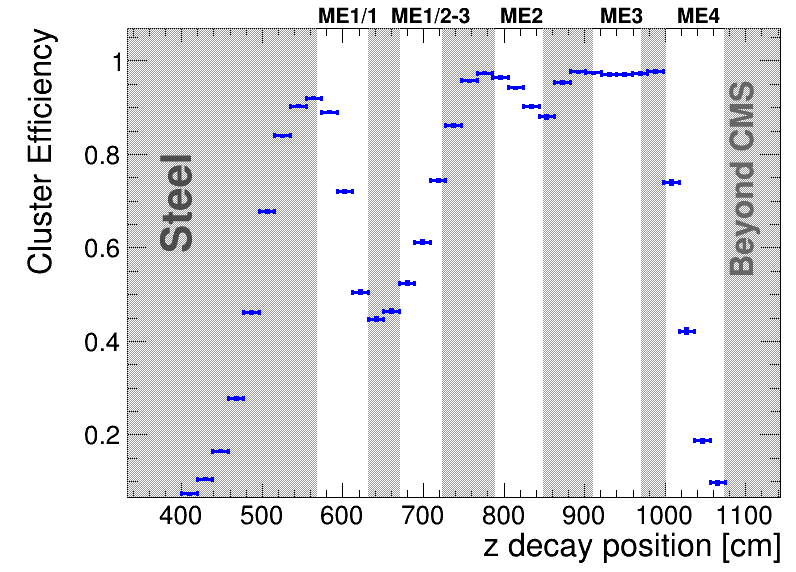

In [14]:
%%time
c = rt.TCanvas('c','c', 800, 600)

h_nominator = rt.TH1D('', '', 35, 400, 1075)
h_denominator = rt.TH1D('', '', 35, 400, 1075)
h_denominator.SetXTitle('z decay position [cm]')
h_denominator.SetYTitle('Cluster Efficiency')

####### FILL IN HERE ########
for i in range(len(cluster_z)): h_nominator.Fill()
for i in range(len(llp_z)): h_denominator.Fill()
###############################

pEff1 = rt.TEfficiency(h_nominator,h_denominator)
pEff1.SetLineColor(4)
pEff1.SetLineWidth(3)
pEff1.Draw()
c.Draw()

print("Inclusive efficiency: {}".format(h_nominator.Integral()/h_denominator.Integral()))

pEff1.GetPaintedGraph().GetHistogram().GetYaxis().SetTitleOffset(0.0);
ymax = pEff1.GetPaintedGraph().GetHistogram().GetMaximum()
ymin = pEff1.GetPaintedGraph().GetHistogram().GetMinimum()
xmin = pEff1.GetPaintedGraph().GetHistogram().GetXaxis().GetXmin()
xmax = pEff1.GetPaintedGraph().GetHistogram().GetXaxis().GetXmax()


######## add gray region for steel ########

# boxes = []
# boxes.append(rt.TBox(xmin,ymin,568,ymax)) #in front of ME11
# boxes.append(rt.TBox(632,ymin,671,ymax)) #between ME11 and ME12
# boxes.append(rt.TBox(724,ymin,789,ymax)) #between ME12 and station2
# boxes.append(rt.TBox(849,ymin,911,ymax)) #between station2 and station3
# boxes.append(rt.TBox(970,ymin,1002,ymax)) #between station3 and station4
# boxes.append(rt.TBox(1073,ymin,xmax,ymax)) #beyond CMS
# for b in boxes:
#     b.SetFillColor(15)
#     b.SetFillStyle(3001)
#     b.Draw('same')


# l = rt.TLatex()
# l.SetTextSize(0.08)
# l.SetTextColor(12)
# l.SetTextAngle(90)

# l.DrawLatex(xmin+80, ymax*0.55, "Steel")

# l2 = rt.TLatex()
# l2.SetTextSize(0.06)
# l2.SetTextColor(13)
# l2.SetTextAngle(90)
# l2.DrawLatex(1110, ymax*0.5, "Beyond CMS")
# text = rt.TLatex()
# text.SetTextSize(0.04)
# text.DrawLatex(570, ymax*1.01, "ME1/1")
# text.DrawLatex(660, ymax*1.01, "ME1/2-3")
# text.DrawLatex(795, ymax*1.01, "ME2")
# text.DrawLatex(920, ymax*1.01, "ME3")
# text.DrawLatex(1015, ymax*1.01, "ME4")
# pEff1.Draw('same')

###############################################################